In [1]:
import numpy as np
import pandas as pd

#data of one room space with noone exiting or leaving, simple headcount being recorded by three cameras 
pre_data = pd.read_csv("occupancy_presence_and_trajectories.csv") 
pre_data.head(10)

,time,day_id,workday,holiday,x,y,occupant_id,height,camera_id
0,08:00:00,0,True,False,235,244,37957,1083,cam0
1,08:00:00.183000,0,True,False,151,282,39222,1103,cam1
2,08:00:00.183000,0,True,False,351,126,39202,1247,cam1
3,08:00:00.296000,0,True,False,236,243,37957,1092,cam0
4,08:00:00.489000,0,True,False,352,126,39202,1239,cam1
5,08:00:00.489000,0,True,False,151,283,39222,1103,cam1
6,08:00:00.495000,0,True,False,236,244,37957,1084,cam0
7,08:00:00.691000,0,True,False,152,283,39222,1103,cam1
8,08:00:00.691000,0,True,False,352,126,39202,1239,cam1
9,08:00:00.801000,0,True,False,237,245,37957,1075,cam0


In [2]:
data = pre_data.drop(pre_data[pre_data.day_id > 6].index)
data

,time,day_id,workday,holiday,x,y,occupant_id,height,camera_id
0,08:00:00,0,True,False,235,244,37957,1083,cam0
1,08:00:00.183000,0,True,False,151,282,39222,1103,cam1
2,08:00:00.183000,0,True,False,351,126,39202,1247,cam1
3,08:00:00.296000,0,True,False,236,243,37957,1092,cam0
4,08:00:00.489000,0,True,False,352,126,39202,1239,cam1
...,...,...,...,...,...,...,...,...,...
3448211,14:24:05.969000,6,False,False,390,152,115829,1660,cam2
3448212,14:24:06.169000,6,False,False,404,152,115829,1652,cam2
3448213,14:24:06.463000,6,False,False,425,147,115829,1638,cam2
3448214,14:24:06.673000,6,False,False,437,140,115829,1604,cam2


In [3]:
# 5.4 million rows in original dataset 
#now 3.4 milion with only 7 days 
len(data)

3448216

In [6]:
# make sure there are no null values and checking how many different values there are per column in the dataset 
stats = data.describe().T
stats['unique'] = [len(data[column].unique()) for column in stats.index]
stats['null'] = [data[column].isnull().sum() for column in stats.index]
stats

,count,mean,std,min,25%,50%,75%,max,unique,null
day_id,3448216.0,2.595880,1.840999,0.0,1.0,2.0,4.00,6.0,7,0
x,3448216.0,343.436297,85.221337,110.0,284.0,353.0,415.00,529.0,416,0
y,3448216.0,187.595339,65.185551,61.0,125.0,190.0,241.00,317.0,255,0
occupant_id,3448216.0,45749.981760,46343.832753,2.0,15159.0,29875.0,46619.25,166640.0,35538,0
height,3448216.0,1214.374825,172.469639,800.0,1127.0,1211.0,1267.00,2461.0,1640,0


In [8]:
# 35,538 different people in the dataset given thats how many unique occupant_id's there are... not exactly because occupant_id is
# "Each head-count" so we need the total number of preople in the building to set a baseline. 
len(data.occupant_id.unique())

35538

In [9]:
#count is how many times occupant_id and time matched since people cant be in multiple places at the same time theyre the same person 
data["count"] = data.groupby("occupant_id")["time"].transform('count')
data

,time,day_id,workday,holiday,x,y,occupant_id,height,camera_id,count
0,08:00:00,0,True,False,235,244,37957,1083,cam0,453
1,08:00:00.183000,0,True,False,151,282,39222,1103,cam1,64
2,08:00:00.183000,0,True,False,351,126,39202,1247,cam1,341
3,08:00:00.296000,0,True,False,236,243,37957,1092,cam0,453
4,08:00:00.489000,0,True,False,352,126,39202,1239,cam1,341
...,...,...,...,...,...,...,...,...,...,...
3448211,14:24:05.969000,6,False,False,390,152,115829,1660,cam2,14
3448212,14:24:06.169000,6,False,False,404,152,115829,1652,cam2,14
3448213,14:24:06.463000,6,False,False,425,147,115829,1638,cam2,14
3448214,14:24:06.673000,6,False,False,437,140,115829,1604,cam2,14


In [10]:
# drop duplicates of time because that means its the same person 
cleaned_data = data.drop_duplicates('time')
cleaned_data

,time,day_id,workday,holiday,x,y,occupant_id,height,camera_id,count
0,08:00:00,0,True,False,235,244,37957,1083,cam0,453
1,08:00:00.183000,0,True,False,151,282,39222,1103,cam1,64
3,08:00:00.296000,0,True,False,236,243,37957,1092,cam0,453
4,08:00:00.489000,0,True,False,352,126,39202,1239,cam1,341
6,08:00:00.495000,0,True,False,236,244,37957,1084,cam0,453
...,...,...,...,...,...,...,...,...,...,...
3448208,14:24:05.171000,6,False,False,333,155,115829,1650,cam2,14
3448210,14:24:05.664000,6,False,False,369,153,115829,1665,cam2,14
3448212,14:24:06.169000,6,False,False,404,152,115829,1652,cam2,14
3448214,14:24:06.673000,6,False,False,437,140,115829,1604,cam2,14


In [11]:
# drop duplicates of count because that means its the same person 
cleaned_data = cleaned_data.drop_duplicates('count')
cleaned_data

,time,day_id,workday,holiday,x,y,occupant_id,height,camera_id,count
0,08:00:00,0,True,False,235,244,37957,1083,cam0,453
1,08:00:00.183000,0,True,False,151,282,39222,1103,cam1,64
4,08:00:00.489000,0,True,False,352,126,39202,1239,cam1,341
269,08:00:25.688000,0,True,False,148,284,39224,1010,cam1,87
540,08:00:48.685000,0,True,False,147,285,39229,1010,cam1,45
...,...,...,...,...,...,...,...,...,...,...
3421430,13:16:03.485000,6,False,False,319,111,27466,1068,cam0,1002
3433532,13:30:08.950000,6,False,False,158,293,134402,1012,cam1,562
3436839,13:33:50.470000,6,False,False,152,291,134424,1148,cam1,1115
3439389,13:37:25.496000,6,False,False,297,106,27898,1434,cam0,871


In [12]:
#remove unnecessary columns 
#this table shoes how many people are 100% present in the room 
cleaned_data = cleaned_data.drop(columns=['workday', 'holiday','camera_id'])
cleaned_data.head(10)

,time,day_id,x,y,occupant_id,height,count
0,08:00:00,0,235,244,37957,1083,453
1,08:00:00.183000,0,151,282,39222,1103,64
4,08:00:00.489000,0,352,126,39202,1239,341
269,08:00:25.688000,0,148,284,39224,1010,87
540,08:00:48.685000,0,147,285,39229,1010,45
676,08:00:59.985000,0,281,98,47628,1288,8
1010,08:01:40.180000,0,286,103,47629,1286,1
1016,08:01:41.409000,0,149,286,39241,1039,184
1127,08:01:57.405000,0,350,128,39249,1210,155
1189,08:02:04.979000,0,278,111,47638,1525,4


In [13]:
# unique labels as people:
cleaned_data[('occupant_id')].value_counts().sort_index(ascending=True)

2         1
4         1
20        1
24        1
52        1
         ..
165481    1
165674    1
165788    1
165907    1
166284    1
Name: occupant_id, Length: 1499, dtype: int64

In [14]:
from sklearn.utils import shuffle
# SHUFFLE data instances to randomize the distribution of different classes
shuf_cleaned_data= shuffle(cleaned_data).reset_index(drop=True)
shuf_cleaned_data

,time,day_id,x,y,occupant_id,height,count
0,09:47:12.497000,1,172,296,156739,1068,1065
1,15:03:19.206000,2,485,223,37488,1157,903
2,13:06:27.077000,2,223,221,23017,1170,820
3,10:59:10.235000,1,477,251,480,1326,2018
4,09:03:28.930000,2,420,140,13175,1253,965
...,...,...,...,...,...,...,...
1494,11:19:37.237000,1,354,145,162615,1220,1814
1495,14:23:39.679000,3,424,257,16333,1747,1961
1496,10:37:52.967000,5,409,286,123711,1073,1462
1497,15:52:39.309000,1,304,103,3157,1411,2543


In [17]:
#making a new column for classification purposes, if were trying to predict if a person is inside of the building or not
# for safety purposes, maybe grandma gets lost inside of a fire. 
results = [1] * 1499
results

[1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,


In [18]:
#changing time to minutes so its a float 
shuf_cleaned_data['time'] = pd.to_datetime(shuf_cleaned_data['time'])
shuf_cleaned_data['minutes'] = shuf_cleaned_data['time'].dt.hour * 60 + shuf_cleaned_data['time'].dt.minute + shuf_cleaned_data['time'].dt.second/60
shuf_cleaned_data

,time,day_id,x,y,occupant_id,height,count,minutes
0,2020-05-05 09:47:12.497,1,172,296,156739,1068,1065,587.200000
1,2020-05-05 15:03:19.206,2,485,223,37488,1157,903,903.316667
2,2020-05-05 13:06:27.077,2,223,221,23017,1170,820,786.450000
3,2020-05-05 10:59:10.235,1,477,251,480,1326,2018,659.166667
4,2020-05-05 09:03:28.930,2,420,140,13175,1253,965,543.466667
...,...,...,...,...,...,...,...,...
1494,2020-05-05 11:19:37.237,1,354,145,162615,1220,1814,679.616667
1495,2020-05-05 14:23:39.679,3,424,257,16333,1747,1961,863.650000
1496,2020-05-05 10:37:52.967,5,409,286,123711,1073,1462,637.866667
1497,2020-05-05 15:52:39.309,1,304,103,3157,1411,2543,952.650000


In [19]:
#adding that new column to daaframe
shuf_cleaned_data['result'] = results    
shuf_cleaned_data

,time,day_id,x,y,occupant_id,height,count,minutes,result
0,2020-05-05 09:47:12.497,1,172,296,156739,1068,1065,587.200000,1
1,2020-05-05 15:03:19.206,2,485,223,37488,1157,903,903.316667,1
2,2020-05-05 13:06:27.077,2,223,221,23017,1170,820,786.450000,1
3,2020-05-05 10:59:10.235,1,477,251,480,1326,2018,659.166667,1
4,2020-05-05 09:03:28.930,2,420,140,13175,1253,965,543.466667,1
...,...,...,...,...,...,...,...,...,...
1494,2020-05-05 11:19:37.237,1,354,145,162615,1220,1814,679.616667,1
1495,2020-05-05 14:23:39.679,3,424,257,16333,1747,1961,863.650000,1
1496,2020-05-05 10:37:52.967,5,409,286,123711,1073,1462,637.866667,1
1497,2020-05-05 15:52:39.309,1,304,103,3157,1411,2543,952.650000,1


In [107]:
# Functions take in features and labels as arrays
# GET FEATURES X FROM THE DATA

X = shuf_cleaned_data.iloc[:, [2,3,5]] # all rows + 3rd, 4th, and 6th columns.
X.head()

,x,y,height
0,172,296,1068
1,485,223,1157
2,223,221,1170
3,477,251,1326
4,420,140,1253


In [68]:
len(X)

1499

In [77]:
# GET LABELS Y FROM THE DATA
Y = shuf_cleaned_data['day_id']
print (Y.value_counts()) #gives the count of each label in the dataset

0    573
1    321
2    305
3    108
4     90
6     54
5     48
Name: day_id, dtype: int64


        time    x    y  occupant_id  height  count  minutes  result
day_id                                                             
0        573  573  573          573     573    573      573     573
1        321  321  321          321     321    321      321     321
2        305  305  305          305     305    305      305     305
3        108  108  108          108     108    108      108     108
4         90   90   90           90      90     90       90      90
5         48   48   48           48      48     48       48      48
6         54   54   54           54      54     54       54      54


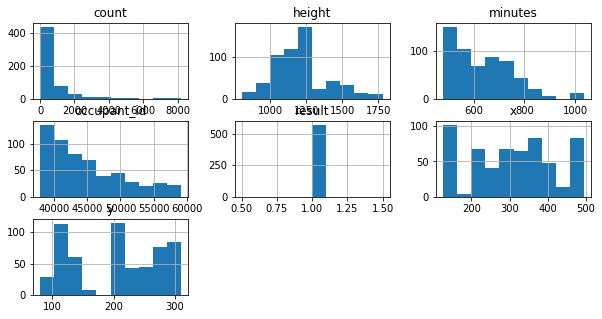

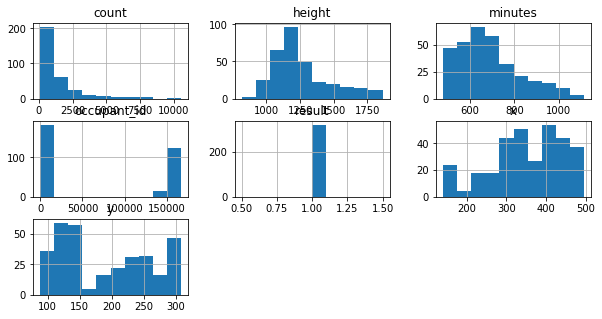

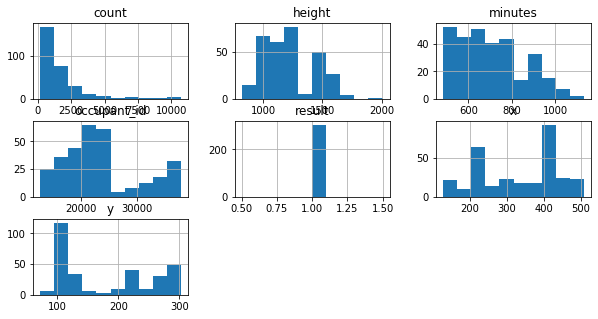

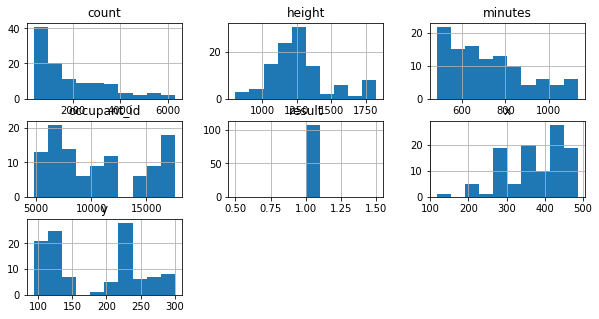

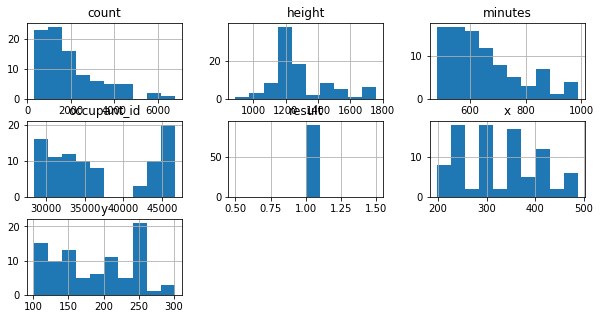

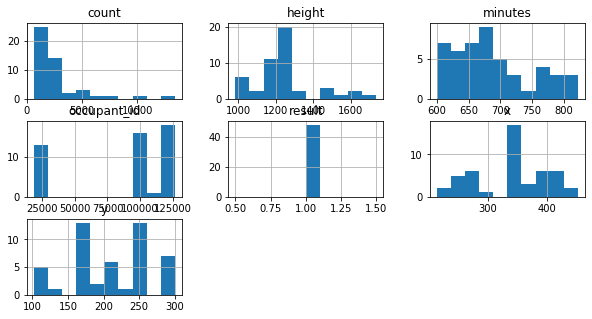

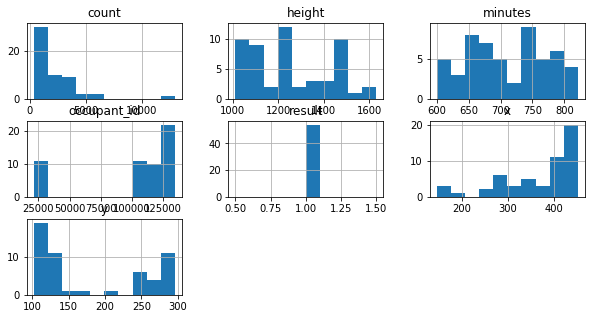

In [78]:
# Check feature distribution of each class, to get an overview of feature and class relationshhip,
# also useful in validating data
from matplotlib import pyplot as plt 
print(shuf_cleaned_data.groupby('day_id').count())
shuf_cleaned_data.groupby('day_id').hist(figsize=(10,5))
plt.show()

In [79]:
# Split data into training and test set using sklearn function
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=100)
print ('Number of samples in training data:',len(x_train))
print ('Number of samples in test data:',len(x_test))


Number of samples in training data: 1199
Number of samples in test data: 300


In [105]:
from sklearn import linear_model

# Name our logistic regression object
LogisticRegressionModel = linear_model.LogisticRegression(solver = 'newton-cg', multi_class='multinomial')

# we create an instance of logistic Regression Classifier and fit the data.
print ('Training a logistic Regression Model..')
LogisticRegressionModel.fit(x_train, y_train)

Training a logistic Regression Model..


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='multinomial', n_jobs=None, penalty='l2',
                   random_state=None, solver='newton-cg', tol=0.0001, verbose=0,
                   warm_start=False)

In [106]:
training_accuracy=LogisticRegressionModel.score(x_train,y_train)
print ('Training Accuracy:',training_accuracy)

Training Accuracy: 0.3969974979149291


In [82]:
# Estimate prediction error logically for each sample and save it in an array called Loss_Array


# this line below will predict a category for every row in x_train
predicted_label = LogisticRegressionModel.predict(x_train)    



def find_error(actual_label,predicted_label):
    '''actual_label= label in data
        predicted_label= label predicted by the model
        
    '''
    
    Loss_Array = np.zeros(len(actual_label)) #create an empty array to store loss values
#     print(Loss_Array)
    
    for i,value in enumerate(actual_label):
        
        if value == predicted_label[i]: 
            Loss_Array[i] = 0
        else:
            Loss_Array[i] = 1

    print ("Y-actualLabel   Z-predictedLabel   Error \n")
    for i,value in enumerate(actual_label):
        print (value,"\t\t" ,predicted_label[i],"\t\t",Loss_Array[i])
        
    error_rate=np.average(Loss_Array)
    print ("\nThe error rate is ", error_rate)
    print ('\nThe accuracy of the model is ',1-error_rate )
    
    
find_error(y_train,predicted_label)

Y-actualLabel   Z-predictedLabel   Error 

0 		 0 		 0.0
0 		 0 		 0.0
1 		 0 		 1.0
0 		 0 		 0.0
2 		 0 		 1.0
0 		 0 		 0.0
3 		 0 		 1.0
0 		 0 		 0.0
1 		 0 		 1.0
0 		 0 		 0.0
1 		 0 		 1.0
0 		 0 		 0.0
1 		 0 		 1.0
2 		 0 		 1.0
1 		 0 		 1.0
3 		 0 		 1.0
3 		 0 		 1.0
0 		 0 		 0.0
6 		 0 		 1.0
1 		 0 		 1.0
0 		 2 		 1.0
2 		 2 		 0.0
1 		 0 		 1.0
0 		 0 		 0.0
1 		 0 		 1.0
0 		 0 		 0.0
4 		 0 		 1.0
0 		 0 		 0.0
0 		 0 		 0.0
1 		 0 		 1.0
6 		 0 		 1.0
0 		 1 		 1.0
0 		 0 		 0.0
3 		 0 		 1.0
0 		 0 		 0.0
0 		 0 		 0.0
2 		 0 		 1.0
2 		 0 		 1.0
0 		 0 		 0.0
1 		 1 		 0.0
2 		 0 		 1.0
1 		 0 		 1.0
2 		 0 		 1.0
0 		 0 		 0.0
2 		 1 		 1.0
2 		 0 		 1.0
0 		 0 		 0.0
0 		 0 		 0.0
0 		 0 		 0.0
2 		 0 		 1.0
2 		 0 		 1.0
1 		 1 		 0.0
0 		 0 		 0.0
0 		 0 		 0.0
0 		 0 		 0.0
5 		 0 		 1.0
0 		 0 		 0.0
0 		 0 		 0.0
0 		 0 		 0.0
0 		 0 		 0.0
2 		 0 		 1.0
2 		 0 		 1.0
1 		 0 		 1.0
0 		 0 		 0.0
0 		 0 		 0.0
1 		 0 		 1.0
1 		 0 		 1.0
0 		 0 		 0.0
0 		 

0 		 0 		 0.0
0 		 0 		 0.0
0 		 0 		 0.0
0 		 0 		 0.0
0 		 0 		 0.0
1 		 0 		 1.0
0 		 0 		 0.0
0 		 0 		 0.0
1 		 0 		 1.0
1 		 0 		 1.0
0 		 0 		 0.0
3 		 1 		 1.0
2 		 0 		 1.0
2 		 0 		 1.0
0 		 0 		 0.0
2 		 1 		 1.0
2 		 1 		 1.0
3 		 0 		 1.0
1 		 2 		 1.0
0 		 0 		 0.0
0 		 0 		 0.0
1 		 0 		 1.0
4 		 0 		 1.0
3 		 1 		 1.0
1 		 0 		 1.0
0 		 0 		 0.0
2 		 0 		 1.0
0 		 0 		 0.0
1 		 0 		 1.0
0 		 0 		 0.0
0 		 0 		 0.0
3 		 0 		 1.0
2 		 1 		 1.0
2 		 2 		 0.0
2 		 1 		 1.0
1 		 0 		 1.0
2 		 1 		 1.0
1 		 0 		 1.0
0 		 0 		 0.0
2 		 0 		 1.0
4 		 0 		 1.0
0 		 0 		 0.0
0 		 0 		 0.0
1 		 0 		 1.0
0 		 1 		 1.0
2 		 0 		 1.0
1 		 0 		 1.0
1 		 0 		 1.0
0 		 0 		 0.0
1 		 0 		 1.0
1 		 0 		 1.0
6 		 0 		 1.0
3 		 0 		 1.0
3 		 0 		 1.0
1 		 1 		 0.0
2 		 0 		 1.0
0 		 0 		 0.0
0 		 0 		 0.0
0 		 0 		 0.0
0 		 0 		 0.0
1 		 0 		 1.0
3 		 0 		 1.0
3 		 1 		 1.0
0 		 0 		 0.0
1 		 0 		 1.0
0 		 0 		 0.0
2 		 0 		 1.0
2 		 0 		 1.0
0 		 0 		 0.0
2 		 0 		 1.0
3 		 1 		 1.0
0 		 0

In [83]:
test_accuracy=LogisticRegressionModel.score(x_test,y_test)
print('Accuracy of the model on unseen test data: ',test_accuracy)

Accuracy of the model on unseen test data:  0.38666666666666666


Coefficients: [[0.0324533]]
Mean squared error: minutes    18465.833874
dtype: float64


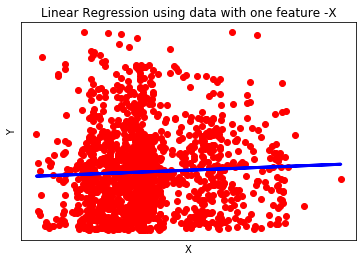

In [102]:
#liear regression model
from sklearn import linear_model


# FEATURE
X_reg = shuf_cleaned_data[['height']]

# Y
Y_reg = shuf_cleaned_data[['minutes']]


# Create linear regression object
LinearRegressionModel= linear_model.LinearRegression()

# Train the model using the training sets
LinearRegressionModel.fit(X_reg, Y_reg)
Z_reg=LinearRegressionModel.predict(X_reg)

# The coefficients
print('Coefficients:', LinearRegressionModel.coef_)
# The mean squared error
print("Mean squared error:",np.mean((Z_reg - Y_reg) ** 2))

# Plot outputs
plt.scatter(X_reg, Y_reg,  color='red')
plt.plot(X_reg, Z_reg, color='blue',
         linewidth=3)
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Linear Regression using data with one feature -X')
plt.xticks(())
plt.yticks(())

plt.show()


In [103]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X)
X_scaled = scaler.transform(X)

In [104]:
x_train_s, x_test_s, y_train, y_test = train_test_split(X_scaled, Y, test_size=0.2, random_state=100)


# Name our logistic regression object
LogisticRegressionModel_s = linear_model.LogisticRegression(solver = 'newton-cg', multi_class='multinomial')

# we create an instance of logistic Regression Classifier and fit the data.
print ('Training a logistic Regression Model..')
LogisticRegressionModel_s.fit(x_train_s, y_train)

training_accuracy_s=LogisticRegressionModel_s.score(x_train_s,y_train)
print ('Training Accuracy:',training_accuracy_s)

test_accuracy_s=LogisticRegressionModel_s.score(x_test_s,y_test)
print('Accuracy of the model on unseen test data: ',test_accuracy_s)

Training a logistic Regression Model..
Training Accuracy: 0.3969974979149291
Accuracy of the model on unseen test data:  0.38666666666666666


In [26]:
# 13 different days are being captured in the dataset 
data.day_id.unique()

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12])

In [6]:
day_zero = data.loc[data['day_id'] == 0]
day_zero.head()

,time,day_id,workday,holiday,x,y,occupant_id,height,camera_id
0,08:00:00,0,True,False,235,244,37957,1083,cam0
1,08:00:00.183000,0,True,False,151,282,39222,1103,cam1
2,08:00:00.183000,0,True,False,351,126,39202,1247,cam1
3,08:00:00.296000,0,True,False,236,243,37957,1092,cam0
4,08:00:00.489000,0,True,False,352,126,39202,1239,cam1


In [7]:
len(day_zero)

467481

In [8]:
#turns time column to datatime with todays date
#data['time'] = pd.to_datetime(data['time'])

In [9]:
#takes random sample of data but only takes time column 
#day_zero = pd.DataFrame(day_zero['time'].sample(n=10000, random_state=1))
#day_zero.head()

In [10]:
day_zero_final = day_zero.sample(frac = .02) 
day_zero_final.sort_index(inplace=True)
day_zero_final.head(10)

,time,day_id,workday,holiday,x,y,occupant_id,height,camera_id
6,08:00:00.495000,0,True,False,236,244,37957,1084,cam0
39,08:00:03.298000,0,True,False,236,243,37957,1092,cam0
74,08:00:06.186000,0,True,False,352,129,39202,1210,cam1
82,08:00:06.984000,0,True,False,350,130,39202,1210,cam1
91,08:00:07.689000,0,True,False,147,283,39222,1019,cam1
100,08:00:08.392000,0,True,False,148,282,39222,1029,cam1
133,08:00:11.185000,0,True,False,147,283,39222,1019,cam1
236,08:00:21.495000,0,True,False,231,242,37957,1075,cam0
268,08:00:25.505000,0,True,False,234,243,37957,1110,cam0
353,08:00:32.685000,0,True,False,146,287,39224,960,cam1


In [11]:
len(day_zero_final)

9350

In [100]:
#export pandas dataframe to csv located in ioer 135 documents 
#day_zero_final.to_csv ('day_zero_final.csv')

In [121]:
day_one = data.loc[data['day_id'] == 1]

In [169]:
len(day_one)

667681

In [122]:
day_one_final = day_one.sample(frac = .02) 
day_one_final.sort_index(inplace=True)
day_one_final.head(10)

,time,day_id,workday,holiday,x,y,occupant_id,height,camera_id
467490,08:00:00.490000,1,True,False,284,188,9135,1224,cam0
467519,08:00:01.983000,1,True,False,232,190,9043,1209,cam0
467586,08:00:05.438000,1,True,False,140,304,151431,911,cam1
467630,08:00:07.490000,1,True,False,282,187,9135,1216,cam0
467637,08:00:07.941000,1,True,False,353,139,150943,1212,cam1
467639,08:00:07.989000,1,True,False,281,188,9135,1208,cam0
467644,08:00:08.248000,1,True,False,414,138,151200,1237,cam1
467669,08:00:09.485000,1,True,False,284,188,9135,1224,cam0
467757,08:00:13.948000,1,True,False,414,138,151200,1252,cam1
467772,08:00:14.692000,1,True,False,289,190,9135,1247,cam0


In [123]:
len(day_one_final)

13354

In [134]:
#export pandas dataframe to csv located in ioer 135 documents 
#day_one_final.to_csv ('day_one_final.csv')

In [129]:
day_two = data.loc[data['day_id'] == 2]

In [170]:
len(day_two)

716191

In [130]:
day_two_final = day_two.sample(frac = .02) 
day_two_final.sort_index(inplace=True)
day_two_final.head(10)

,time,day_id,workday,holiday,x,y,occupant_id,height,camera_id
1135396,08:02:27.991000,2,True,False,475,105,20393,1008,cam2
1135407,08:02:30.691000,2,True,False,478,120,20393,870,cam2
1135428,08:02:35.996000,2,True,False,477,120,20393,894,cam2
1135567,08:04:40.487000,2,True,False,478,103,20404,957,cam2
1135629,08:04:55.988000,2,True,False,478,103,20404,967,cam2
1135771,08:05:31.489000,2,True,False,478,103,20404,957,cam2
1135779,08:05:33.487000,2,True,False,478,103,20404,967,cam2
1135888,08:06:00.691000,2,True,False,472,115,20404,895,cam2
1135916,08:06:07.710000,2,True,False,472,115,20404,895,cam2
1135962,08:06:19.211000,2,True,False,472,115,20404,883,cam2


In [131]:
len(day_two_final)

14324

In [135]:
#export pandas dataframe to csv located in ioer 135 documents 
#day_two_final.to_csv ('day_two_final.csv')

In [136]:
day_three = data.loc[data['day_id'] == 3]

In [137]:
len(day_three)

493060

In [141]:
day_three_final = day_three.sample(frac = .02) 
day_three_final.sort_index(inplace=True)
day_three_final.head(10)

,time,day_id,workday,holiday,x,y,occupant_id,height,camera_id
1851384,08:00:07.997000,3,True,False,286,220,4569,1255,cam0
1851417,08:00:16.316000,3,True,False,288,220,4569,1249,cam0
1851525,08:00:38.498000,3,True,False,282,222,4569,1224,cam0
1851527,08:00:38.804000,3,True,False,282,223,4569,1209,cam0
1851533,08:00:39.817000,3,True,False,283,223,4569,1209,cam0
1851584,08:00:52.003000,3,True,False,290,218,4569,1249,cam0
1851590,08:00:53.505000,3,True,False,291,219,4569,1249,cam0
1851640,08:01:05.799000,3,True,False,291,221,4569,1306,cam0
1851684,08:01:15.492000,3,True,False,288,100,6705,1393,cam2
1851686,08:01:15.704000,3,True,False,288,100,6706,1393,cam2


In [142]:
len(day_three_final)

9861

In [143]:
#export pandas dataframe to csv located in ioer 135 documents 
#day_three_final.to_csv ('day_three_final.csv')

In [144]:
day_four = data.loc[data['day_id'] == 4]

In [145]:
len(day_four)

488080

In [147]:
day_four_final = day_four.sample(frac = .02) 
day_four_final.sort_index(inplace=True)
day_four_final.head(10)

,time,day_id,workday,holiday,x,y,occupant_id,height,camera_id
2344471,08:00:02.438000,4,True,False,475,227,42338,1234,cam2
2344535,08:00:05.235000,4,True,False,475,227,42338,1234,cam2
2344602,08:00:07.926000,4,True,False,357,133,28430,1211,cam1
2344692,08:00:11.725000,4,True,False,355,161,28408,1290,cam1
2344702,08:00:11.987000,4,True,False,225,255,29451,1233,cam0
2344761,08:00:14.587000,4,True,False,235,211,29341,1205,cam0
2344868,08:00:18.943000,4,True,False,398,231,42495,1296,cam2
2344974,08:00:23.428000,4,True,False,357,161,28408,1260,cam1
2345053,08:00:26.743000,4,True,False,468,225,42338,1210,cam2
2345173,08:00:31.643000,4,True,False,356,134,28430,1211,cam1


In [148]:
len(day_four_final)

9762

In [163]:
#export pandas dataframe to csv located in ioer 135 documents 
#day_four_final.to_csv ('day_four_final.csv')

In [150]:
day_five = data.loc[data['day_id'] == 5]

In [151]:
len(day_five)

274746

In [153]:
day_five_final = day_five.sample(frac = .02) 
day_five_final.sort_index(inplace=True)
day_five_final.head(10)

,time,day_id,workday,holiday,x,y,occupant_id,height,camera_id
2832560,10:00:06.492000,5,False,False,356,166,122915,1217,cam1
2832593,10:00:09.189000,5,False,False,355,166,122915,1239,cam1
2832614,10:00:10.993000,5,False,False,350,301,122943,974,cam1
2832678,10:00:16.238000,5,False,False,279,221,18652,1247,cam0
2832682,10:00:16.708000,5,False,False,354,166,122915,1217,cam1
2832706,10:00:18.684000,5,False,False,348,305,122943,868,cam1
2832768,10:00:23.740000,5,False,False,348,305,122943,879,cam1
2832781,10:00:24.943000,5,False,False,279,220,18652,1247,cam0
2832806,10:00:26.993000,5,False,False,345,306,122943,868,cam1
2832935,10:00:38.444000,5,False,False,280,219,18652,1210,cam0


In [154]:
len(day_five_final)

5495

In [157]:
#export pandas dataframe to csv located in ioer 135 documents 
#day_five_final.to_csv ('day_five_final.csv')

In [158]:
day_six = data.loc[data['day_id'] == 6]

In [159]:
len(day_six)

340977

In [160]:
day_six_final = day_six.sample(frac = .02) 
day_six_final.sort_index(inplace=True)
day_six_final.head(10)

,time,day_id,workday,holiday,x,y,occupant_id,height,camera_id
3107263,10:00:01.235000,6,False,False,379,101,20924,1390,cam0
3107301,10:00:03.187000,6,False,False,339,109,107415,1428,cam2
3107664,10:00:20.741000,6,False,False,294,104,20859,1422,cam0
3107675,10:00:21.240000,6,False,False,294,104,20859,1409,cam0
3107683,10:00:21.686000,6,False,False,336,116,107415,1486,cam2
3107715,10:00:23.228000,6,False,False,395,296,128329,1026,cam1
3107750,10:00:24.939000,6,False,False,382,103,20927,1422,cam0
3107797,10:00:27.183000,6,False,False,335,114,107415,1457,cam2
3107815,10:00:27.938000,6,False,False,381,103,20927,1422,cam0
3107820,10:00:28.235000,6,False,False,382,103,20927,1422,cam0


In [161]:
len(day_six_final)

6820

In [162]:
#export pandas dataframe to csv located in ioer 135 documents 
#day_six_final.to_csv ('day_six_final.csv')